<a href="https://colab.research.google.com/github/RJuro/am-21/blob/main/2021_04_19_ha_am_intro_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro til Anvendt Matematik og Python opfriskning


- Matematik bruges i finance, økonomistyring, data science, tech og meget andet - men også helt sikkert senere hvis I skal videre med en kandidat.
- Analytiske skills er meget [eftertragtede på arbejdsmarkedet](https://youtu.be/u2oupkbxddc 
) 
> [Ny DI-analyse viser](https://www.danskindustri.dk/tech-der-taller/analysearkiv/analyser/2020/10/kompetencer-til-et-digitalt-arbejdsliv/), at den digitale omstilling i virksomheder ikke kan drives af it-specialisterne alene. Der er i stærkt stigende omfang behov for, at samfundsvidenskabelige profiler også har gode digitale kompetencer.


### Hvad sker her fra idag til 21 Juni?

- overblik over linkeær algebra og calculus (ikke meget mere end B niveau)
- Brug gerne fx https://www.webmatematik.dk/ 
- $\LaTeX$ [cheat-sheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf)
- [Markdown cheatsheet](https://www.markdownguide.org/cheat-sheet/)
- Lære at **bruge** matematik - ikke være matematiker¨
- lære fra et data/computer science perspektiv, hvor det handler mest at kunne implementere matematik direkte og bruge til fx at bygge en søgemaskine, recommender system, visualisere eller automatisere BI 
- "computational tilgang" - Python som tool
- Danglish

### Pingvin Motivation og Intuition - Fra Data og Statistik til Liniær Algebra

Pinguin data: https://github.com/allisonhorst/palmerpenguins
![](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

Vi bygger en søgemaskine til pingviner 🤔

Antagelse:
- Pingviner kan bedst lide at være sammen med dem, der ligner dem mest


In [33]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

In [34]:
pinguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [35]:
pinguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [36]:
pinguins = pinguins.dropna()
pinguins.species_short.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

In [37]:
pinguins.index = range(len(pinguins))

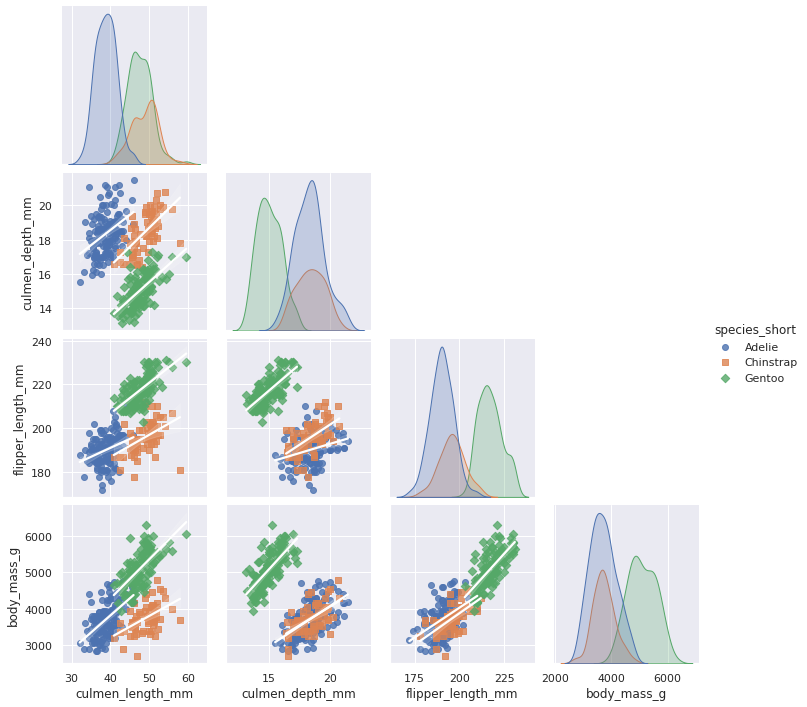

In [38]:
# Hvordan ser vores data ud?

sns.pairplot(pinguins, hue='species_short', kind="reg", corner=True, markers=["o", "s", "D"], plot_kws={'line_kws':{'color':'white'}})

Vi danner alle variable om til Z-scores (så de er på samme skala)

$Z = \frac{x-\mu}{\sigma} $

x = værdi, 
$\mu$ = gennemsnit, $\sigma$ = stadnardafvigelse


In [39]:
# scaling - vi tager kun de 4 nummeriske variable

from sklearn.preprocessing import StandardScaler
scaled_pinguins = StandardScaler().fit_transform(pinguins.loc[:,'culmen_length_mm':'body_mass_g'])

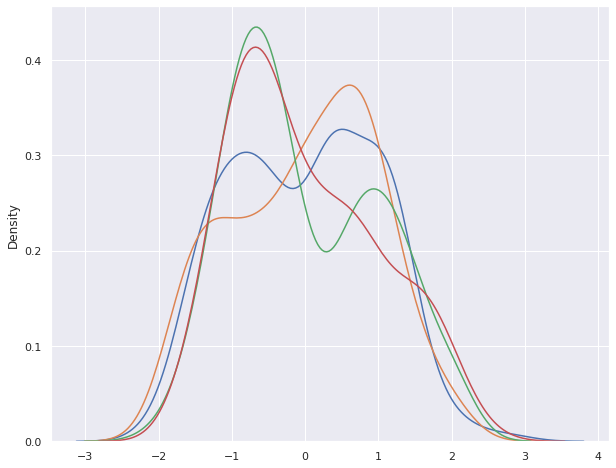

In [40]:
# plot af alle skalerede variable, som nu har gennemsnit ~ 0 og std ~ 1

for i in range(4):
  sns.kdeplot(scaled_pinguins[:,i])

In [41]:
print(scaled_pinguins.shape)
scaled_pinguins

(334, 4)


array([[-0.89765322,  0.78348666, -1.42952144, -0.57122888],
       [-0.82429023,  0.12189602, -1.07240838, -0.50901123],
       [-0.67756427,  0.42724555, -0.42960487, -1.19340546],
       ...,
       [ 1.17485108, -0.74326098,  1.49880565,  1.91747742],
       [ 0.22113229, -1.20128527,  0.78457953,  1.23308319],
       [ 1.08314735, -0.53969463,  0.85600214,  1.48195382]])

In [42]:
# pinguin 1 kan representeres som en 4D række-vektor

scaled_pinguins[0,:]

array([-0.89765322,  0.78348666, -1.42952144, -0.57122888])

Nu bruger vi noget, som vi måske kommer til at se på helt til sidst i Liniær Algebra, næmlig Principal Component Analysis eller PCA.
- læs mere om PCA og hvordan man [bygger det fra bunden](https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51))
- Hvis du er meget interesseret - [læs her](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

Vi bruger 2 components (dvs. vores 4D vektorer bliver skrumpet til 2D hvor PCA forsøger at beholde så meget information som muligt



In [43]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [44]:
# Transform penguin matrix med PCA

pca_pinguins = pca.fit_transform(scaled_pinguins)

In [45]:
print(pca_pinguins.shape)
pca_pinguins

(334, 2)


array([[-1.85848815,  0.03167633],
       [-1.32072197, -0.44347275],
       [-1.3816875 , -0.16108641],
       [-1.89089671, -0.01455592],
       [-1.92583912,  0.81617939],
       [-1.77762564, -0.36627297],
       [-0.82367924,  0.49925942],
       [-1.80358549, -0.24403619],
       [-1.96223043,  0.99612874],
       [-1.57564793,  0.57324551],
       [-1.75275951, -0.61168037],
       [-1.58122862,  0.0856511 ],
       [-0.81030574,  1.29279471],
       [-2.35538369, -0.64766742],
       [-1.01078942,  1.97342517],
       [-2.41302575, -0.30928293],
       [-2.11868773, -0.13743642],
       [-1.8624334 , -0.11174636],
       [-1.50972042, -0.2900524 ],
       [-1.58542467, -0.60385974],
       [-1.93370793, -0.3000802 ],
       [-1.76786874,  0.1386897 ],
       [-1.70849198, -0.18710269],
       [-2.71911792, -0.20123026],
       [-1.68714221,  0.28568225],
       [-1.88418751, -0.78150116],
       [-1.91542962, -0.40774928],
       [-1.66169617, -0.3281584 ],
       [-1.52330869,

Nu bruger vi denne 2D matrix og plotter, hvor 1.kollonne = x; 2. kolonne = y; vi bruger farver fra pingvin-arter i vores start-data

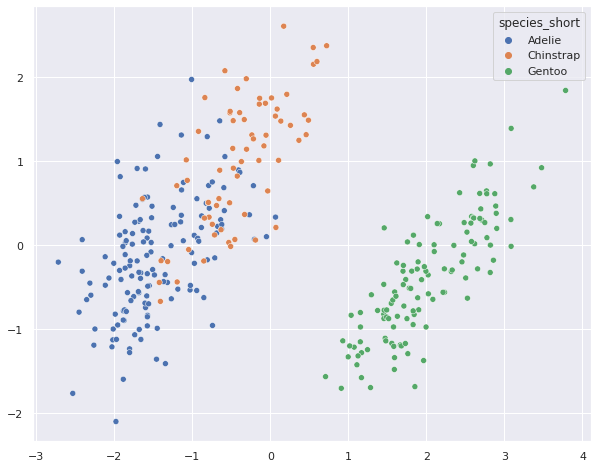

In [46]:
sns.scatterplot(x = pca_pinguins[:,0], y = pca_pinguins[:,1], hue = pinguins['species_short'] )

Hvordan finder vi så en buddy for en given pingvin?

- det er den, der er tættest på 🤖

**Eucledian Distance**

![](https://upload.wikimedia.org/wikipedia/commons/5/55/Euclidean_distance_2d.svg)

**Vi kan også gå fra 2D til n-D**

$d(\vec{u}, \vec{v}) = \| \vec{u} - \vec{v} \| = \sqrt{(u_1 - v_1)^2 + (u_2 - v_2)^2 ... (u_n - v_n)^2}$

fx

Vi kan regne ED mellem
$\vec{u} = (2, 3, 4, 2)$ 

og 

$\vec{v} = (1, -2, 1, 3)$

$\begin{align} d(\vec{u}, \vec{v}) = \| \vec{u} - \vec{v} \| = \sqrt{(2-1)^2 + (3+2)^2 + (4-1)^2 + (2-3)^2} \\ d(\vec{u}, \vec{v}) = \| \vec{u} - \vec{v} \| = \sqrt{1 + 25 + 9 + 1} \\ d(\vec{u}, \vec{v}) = \| \vec{u} - \vec{v} \| = \sqrt{36} \\ d(\vec{u}, \vec{v}) = \| \vec{u} - \vec{v} \| = 6 \end{align}$

In [47]:
# hvor tæt er de første 2
print(scaled_pinguins[0,:])
print(scaled_pinguins[1,:])

[-0.89765322  0.78348666 -1.42952144 -0.57122888]
[-0.82429023  0.12189602 -1.07240838 -0.50901123]


In [48]:
# kvardarod er ikke standard og skal importeres
from math import sqrt

In [49]:
# manuelt
sqrt((-0.89765322--0.82429023)**2 + (0.78348666-0.12189602)**2 + (-1.42952144--1.07240838)**2 + (-0.57122888--0.50901123)**2)

0.7579479380745329

In [50]:
# med numpy
np.linalg.norm(scaled_pinguins[0,:] - scaled_pinguins[1,:])

0.757947942517268

In [51]:
np.linalg.norm(scaled_pinguins[0,:] - scaled_pinguins[2,:])

1.249913482211539

In [52]:
pinguins.iloc[:5,:]

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [53]:
pinguins.iloc[-5:,:]

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
329,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
330,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
331,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
332,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
333,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [54]:
np.linalg.norm(scaled_pinguins[0,:] - scaled_pinguins[333,:])

3.887615834331366

In [55]:
np.linalg.norm(scaled_pinguins[0,:] - scaled_pinguins[331,:])

4.6254719817752035

In [56]:
import matplotlib.pyplot as plt

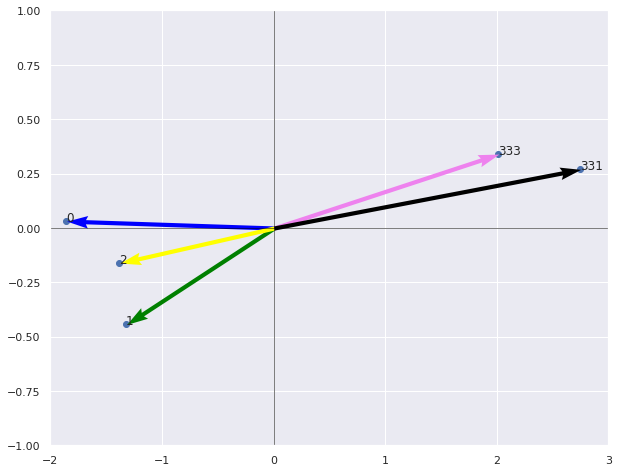

In [57]:
# This code draws the x and y axis as lines.

points = [0,1,2,333,331]


fig, ax = plt.subplots()

ax.scatter(pca_pinguins[[points],0], pca_pinguins[[points],1])

plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-2,3)
plt.ylim(-1,1)

plt.quiver(0, 0, pca_pinguins[0,0], pca_pinguins[0,1], angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(0, 0, pca_pinguins[1,0], pca_pinguins[1,1], angles='xy', scale_units='xy', scale=1, color='green')
plt.quiver(0, 0, pca_pinguins[2,0], pca_pinguins[2,1], angles='xy', scale_units='xy', scale=1, color='yellow')
plt.quiver(0, 0, pca_pinguins[333,0], pca_pinguins[333,1], angles='xy', scale_units='xy', scale=1, color='violet')
plt.quiver(0, 0, pca_pinguins[331,0], pca_pinguins[331,1], angles='xy', scale_units='xy', scale=1, color='black')

for i in points:
    ax.annotate(str(i), (pca_pinguins[i,0], pca_pinguins[i,1]))

Man kunne nu enten skrive noget, som gentager denne beregning for alle kombinationer...eller

In [58]:
from sklearn.metrics.pairwise import euclidean_distances

In [59]:
euclidean_matrix = euclidean_distances(scaled_pinguins)

In [60]:
print(euclidean_matrix.shape)
euclidean_matrix

(334, 334)


array([[0.        , 0.75794794, 1.24991348, ..., 4.62547198, 3.65359902,
        3.88761583],
       [0.75794794, 0.        , 0.99817767, ..., 4.15259574, 3.05401605,
        3.42910036],
       [1.24991348, 0.99817767, 0.        , ..., 4.26589822, 3.28965941,
        3.58404958],
       ...,
       [4.62547198, 4.15259574, 4.26589822, ..., 0.        , 1.44840609,
        0.80791459],
       [3.65359902, 3.05401605, 3.28965941, ..., 1.44840609, 0.        ,
        1.11705413],
       [3.88761583, 3.42910036, 3.58404958, ..., 0.80791459, 1.11705413,
        0.        ]])

In [61]:
np.argmin(euclidean_matrix[0,:])

0

In [62]:
np.argsort(euclidean_matrix[0,:])[:3]

array([  0, 139,  16])

In [63]:
scaled_pinguins[[0,139,16],:]

array([[-0.89765322,  0.78348666, -1.42952144, -0.57122888],
       [-0.91599396,  0.78348666, -1.14383099, -0.6956642 ],
       [-1.15442366,  0.78348666, -1.50094405, -0.75788186]])

In [64]:
euclidean_distances(scaled_pinguins[[0,139,16],:])

array([[0.        , 0.31215311, 0.32537914],
       [0.31215311, 0.        , 0.43387728],
       [0.32537914, 0.43387728, 0.        ]])

### Python fresh-up

- Simple datatyper
- Grundlæggende matematiske operationer
- Lister
- Funktioner
- Control Flow


#### Simple datatyper
- Integers - hele tal **6**
- Floating-Point Numbers - decimaltal **3.2**
- Boolean - digital data type / bit **True / False**
- String - text **Roman*

In [65]:
i = 6
print(i, type(i))

6 <class 'int'>


In [66]:
x = 3.2
print(x, type(x))

3.2 <class 'float'>


In [67]:
t = i == 6
print(t, type(t))

True <class 'bool'>


In [68]:
s = 'Hello'
print(s, type(s))

Hello <class 'str'>


#### Grundlæggende matematiske operationer

In [69]:
a = 2.0
b = 3.0
print(a+b, a*b, a-b, a/b, a**2, a+b**2, (a+b)**2)

5.0 6.0 -1.0 0.6666666666666666 4.0 11.0 25.0


In [70]:
c = a + b
print(c)

5.0


In [71]:
a + b == c

True

In [72]:
a + b < c

False

#### Lister

man kan pakke alt i en liste :-)

In [73]:
l = ['Eskil', 1.0, sqrt]
type(l)

list

In [74]:
l[2]

<function math.sqrt>

In [75]:
l[0]

'Eskil'

In [76]:
l.append('Roman')

In [77]:
l

['Eskil', 1.0, <function math.sqrt>, 'Roman']

In [78]:
l.extend(['Marie',37])

In [79]:
l

['Eskil', 1.0, <function math.sqrt>, 'Roman', 'Marie', 37]

In [80]:
l.pop(2)

<function math.sqrt>

In [81]:
l

['Eskil', 1.0, 'Roman', 'Marie', 37]

#### Funktioner

Funktioner har (normalt) in og outputs. $a$ og $b$ er vores input her og funktionen producerer $\sqrt{a^2 + b^2}$ som output.

Vi prøver lige ...

$\begin{align} a^2 + b^2 = c^2 \rightarrow c = \sqrt{a^2 + b^2} \end{align}$ 

In [83]:
def pythagoras(a, b):
  return sqrt(a**2 + b**2)

In [84]:
some_list = [(2,4),(6,7),(8,9),(1,6)]

In [85]:
pd.DataFrame(some_list)

,0,1
0,2,4
1,6,7
2,8,9
3,1,6


In [88]:
[pythagoras(stuff[0],stuff[1]) for stuff in some_list]

[4.47213595499958, 9.219544457292887, 12.041594578792296, 6.082762530298219]

In [ ]:
# Hvis man gør det rigtigt, så er det en god ide at kommentere hvad der sker. 
# Her er det en no-brainer men funktioner kan blive indviklede og
# det er good-practice at skrive "docstrings" til en anden eller en selv (i)

def pythagoras(a, b):
    """
    Computes the length of the hypotenuse of a right triangle
    
    Arguments
    a, b: the two lengths of the right triangle
    """
    
    return sqrt(a**2 + b**2)

##### Mini-assignment
* Lav en funktion, som tager to punkter $(x_1, y_1), (x_2, y_2)$ på en linje og beregner hældning $a$

$$ y = ax + b$$

$$ a = \frac{y_2- y_1}{x_2 - x_1}$$

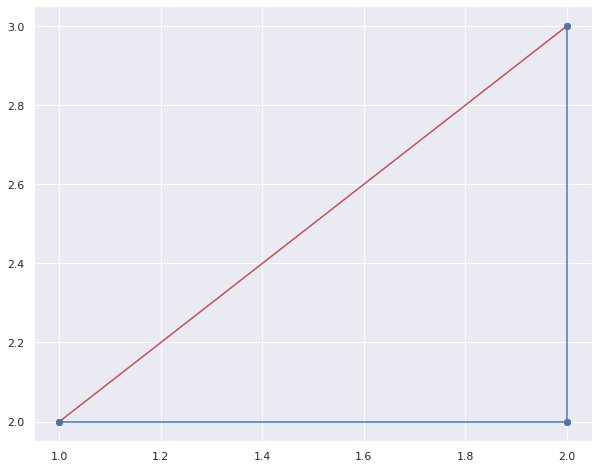

In [89]:
plt.plot((1,2), (2,3), 'ro-')
plt.plot((1,2), (2,2), 'bo-')
plt.plot((2,2), (2,3), 'bo-')

In [90]:
#(1,2); (2,3)


(3-2)/(2-1)

1.0

In [91]:
def slope(x1,x2,y1,y2):
  return ((y2-y1)/(x2-x1))

In [94]:
slope(2,3,4,5)

1.0

#### Control flow

In [95]:
def isNegative(n):
    if n < 0:
        return True
    else:
        return False

In [108]:

some_numbers = np.random.randint(-10,10, size=20)

In [110]:
sum([isNegative(x) for x in some_numbers])

10

##### Mini-assignment
* Lav en funktion `KtoC` som regner Kelvin om til Celcius
$$ C = K - 273.15 \quad \text{ved} \quad C\geq - 273.15$$
Funktionen udgiver `None` hvis $C < -273.15$

In [111]:
def KtoC(k):
  c = k - 273.15
  if c >= -273.15:
    return c
  else:
    return None

In [115]:
def KtoC(k):
  c = k - 273.15
  if c < -273.15:
    return None
  else:
    return c

In [117]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [118]:
np.random.randint(-10,10, size=10)

array([ 0, -5, -4, -5,  0,  3,  5, -5,  4, -4])

In [121]:
for number in [1,3,6,7,8]:
  print(number)
  print('🙄')

1
🙄
3
🙄
6
🙄
7
🙄
8
🙄


In [119]:
# for-loop

even = [] # tom liste

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    even.append(i*2)


print(even)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [ ]:
# list-comprehension 

even = [2*i for i in range(10)]

print(even)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


##### Mini-assignment
1. Beregn summen af integers  1 ... 100 ved at bruge `sum`, for-loop
2. Beregn summen af integers  1 ... 100 ved at bruge partial-sum formula
$$ \sum_{k=1}^n k = 1 + 2 + \cdots + (n-1) + n = \frac{n(n+1)}{2}$$

In [123]:
# brug sum

sum(range(1,101))

5050

In [127]:
# for-loop

summe_1_100 = 0

for i in range(1,101):
  summe_1_100 = summe_1_100 + i

summe_1_100

5050

In [135]:
z = 1

In [134]:
(100*(100+1))/2

5050.0

### Matematik fresh-up
alle øvelser taget fra https://tutorial.math.lamar.edu/Problems/Alg/Preliminaries.aspx

Erfaringen viser, at det er en god idé at få sig en god routine med at løse matematiske problemer.

- Integer Exponents
- Rational Exponents
- Radicals
- Polynomials

Vi arbejder old-school med papir men bruger også `SymPy` for at tjekke vores løsninger

#### Integer Exponents

$- {6^2} + 4 \cdot {3^2}$

${\left( {2{w^4}{v^{ - 5}}} \right)^{ - 2}}$ (løsning med kun positive eksponenter!)

In [ ]:
from sympy import *

In [ ]:
simplify(-6**2+4*3**2)

0

In [ ]:
w, v = symbols('w v')
simplify((2*w**4*v**-5)**-2)

v**10/(4*w**8)

#### Rational Exponents
${\left( { - 125} \right)^{\frac{1}{3}}}$

${\left( {{a^3}\,{b^{ - \,\,\frac{1}{4}}}} \right)^{\frac{2}{3}}}$

In [ ]:
simplify(-125**(1/3), rational=True)

-5.00000000000000

In [ ]:
a, b = symbols('a b')
simplify((a**3*b**(-1/4))**(2/3), rational=True)

(a**3/b**(1/4))**(2/3)

#### Radicals
$$\begin{array}{c} \sqrt[7]{y}\\ \sqrt[3]{{{x^2}}} \\ \sqrt[3]{{ - 512}} \\ \sqrt x \left( {4 - 3\sqrt x } \right)\end{array}$$

In [ ]:
x, y, z = symbols('x, y , z')

In [ ]:
simplify((x**2)**(1/3), rational=True)

(x**2)**(1/3)

In [ ]:
simplify(-512**(1/3), rational=True)

-8.00000000000000

In [ ]:
simplify(sqrt(x)*(4 - 3*sqrt(x)), rational = True)

4*sqrt(x) - 3*x

#### Polynomials

$$(4{x^3} - 2{x^2} + 1) + (7{x^2} + 12x)$$


In [ ]:
simplify((4*x**3-2*x**2+1)+(7*x**2+12*x))

4*x**3 + 5*x**2 + 12*x + 1

## Homework 😳

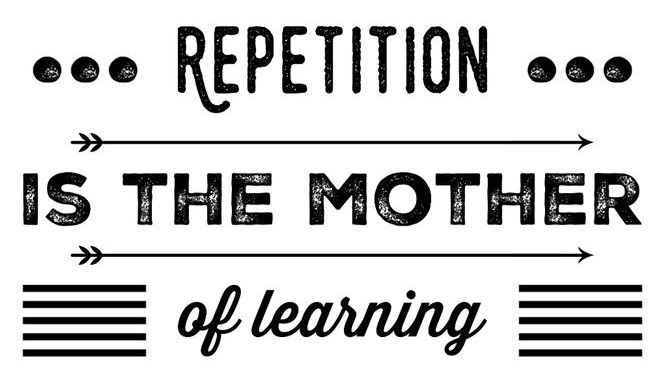

https://tutorial.math.lamar.edu/Problems/Alg/Preliminaries.aspx

- Integer Exponents
- Rational Exponents
- Radicals
- Polynomials


